## Univariate selection

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
loans = pd.read_csv('/root/data/loansData.csv')

In [3]:
loans.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
81174,20000,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
99592,19200,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
80059,35000,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
15825,10000,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
33182,12000,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [4]:
diabetes = pd.read_csv('/root/data/diabetes.csv')

In [5]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
loans.columns

Index(['Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
       'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio', 'State',
       'Home.Ownership', 'Monthly.Income', 'FICO.Range', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months',
       'Employment.Length'],
      dtype='object')

In [7]:
x = loans.drop(['Amount.Funded.By.Investors'],axis=1)

In [8]:
y = loans['Amount.Funded.By.Investors']

In [9]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)

ValueError: could not convert string to float: '8.90%'

In [10]:
featurescores = pd.concat([])

ValueError: No objects to concatenate

In [11]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
x = diabetes.iloc[:, 0:8]
y = diabetes.iloc[:, 8:]

In [13]:
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(x,y)

In [14]:
scores = pd.DataFrame(fit.scores_, x.columns)
#columns = pd.Data

In [15]:
scores.columns = ['specs']

In [16]:
scores

,specs
Pregnancies,111.519691
Glucose,1411.887041
BloodPressure,17.605373
SkinThickness,53.108040
Insulin,2175.565273
BMI,127.669343
DiabetesPedigreeFunction,5.392682
Age,181.303689


In [17]:
scores.sort_values(['specs'],ascending=False)

,specs
Insulin,2175.565273
Glucose,1411.887041
Age,181.303689
BMI,127.669343
Pregnancies,111.519691
SkinThickness,53.108040
BloodPressure,17.605373
DiabetesPedigreeFunction,5.392682


In [18]:
scores.nlargest(10,'specs')

,specs
Insulin,2175.565273
Glucose,1411.887041
Age,181.303689
BMI,127.669343
Pregnancies,111.519691
SkinThickness,53.108040
BloodPressure,17.605373
DiabetesPedigreeFunction,5.392682


## Feature Importance

In [19]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)

/root/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [20]:
model.feature_importances_

array([0.10644767, 0.24412122, 0.09383258, 0.08550472, 0.07539727,
       0.13790903, 0.11728902, 0.1394985 ])

In [21]:
fea_importance = pd.Series(model.feature_importances_, index = x.columns)

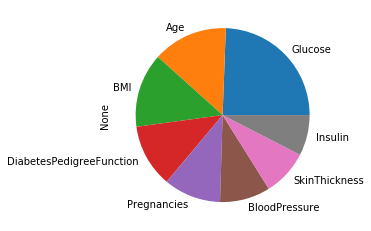

In [22]:
fea_importance.nlargest(10).plot(kind='pie')

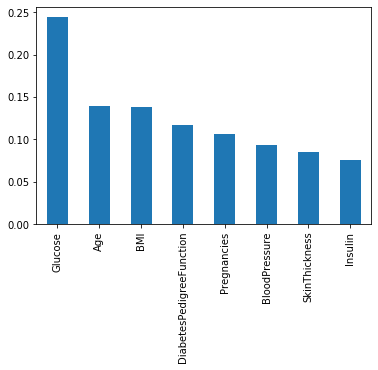

In [23]:
fea_importance.nlargest(10).plot(kind='bar')

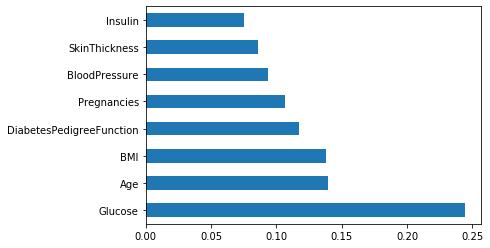

In [24]:
fea_importance.nlargest(10).plot(kind='barh')

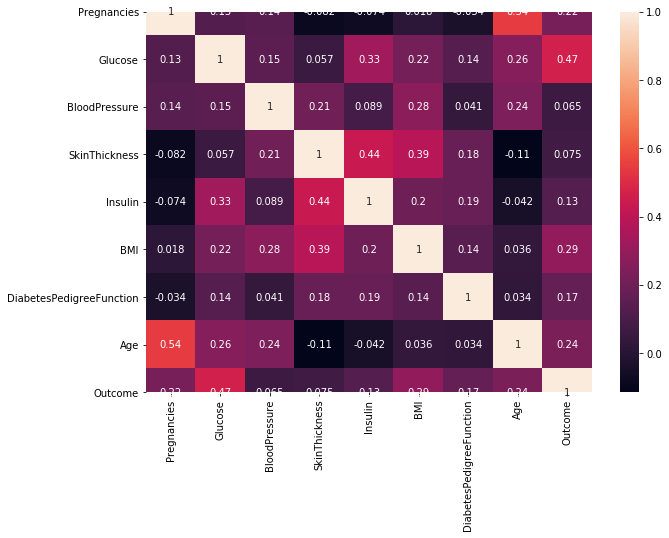

In [25]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(diabetes.corr(), annot=True)


## One-hot encoding

In [26]:
loans.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
81174,20000,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
99592,19200,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
80059,35000,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
15825,10000,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
33182,12000,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [27]:
dummies = pd.get_dummies(loans['Loan.Purpose'])

In [28]:
dummies

,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
81174,0,0,1,0,0,0,0,0,0,0,0,0,0,0
99592,0,0,1,0,0,0,0,0,0,0,0,0,0,0
80059,0,0,1,0,0,0,0,0,0,0,0,0,0,0
15825,0,0,1,0,0,0,0,0,0,0,0,0,0,0
33182,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23735,0,0,1,0,0,0,0,0,0,0,0,0,0,0
65882,0,0,0,0,1,0,0,0,0,0,0,0,0,0
55610,0,0,1,0,0,0,0,0,0,0,0,0,0,0
38576,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [29]:
home = pd.get_dummies(loans['Home.Ownership'])

In [30]:
home

,MORTGAGE,NONE,OTHER,OWN,RENT
81174,1,0,0,0,0
99592,1,0,0,0,0
80059,1,0,0,0,0
15825,1,0,0,0,0
33182,0,0,0,0,1
...,...,...,...,...,...
23735,1,0,0,0,0
65882,0,0,0,1,0
55610,1,0,0,0,0
38576,0,0,0,0,1


In [31]:
state = pd.get_dummies(loans['State'])

In [32]:
new_loans = pd.concat([loans,dummies,home,state], axis=1)

In [33]:
new_loans.columns

Index(['Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
       'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio', 'State',
       'Home.Ownership', 'Monthly.Income', 'FICO.Range', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months',
       'Employment.Length', 'car', 'credit_card', 'debt_consolidation',
       'educational', 'home_improvement', 'house', 'major_purchase', 'medical',
       'moving', 'other', 'renewable_energy', 'small_business', 'vacation',
       'wedding', 'MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT', 'AK', 'AL', 'AR',
       'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'IL', 'IN',
       'KS', 'KY', 'LA', 'MA', 'MD', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'NH',
       'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'],
      dtype='object')

We remove one of the dummy variables to remove multicollineality

In [58]:
final = new_loans.drop(['Loan.Purpose','Home.Ownership','other','NONE','State','WY'],axis=1)

In [35]:
final.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Debt.To.Income.Ratio,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,...,RI,SC,SD,TX,UT,VA,VT,WA,WI,WV
81174,20000,20000.0,8.90%,36 months,14.90%,6541.67,735-739,14.0,14272.0,2.0,...,0,1,0,0,0,0,0,0,0,0
99592,19200,19200.0,12.12%,36 months,28.36%,4583.33,715-719,12.0,11140.0,1.0,...,0,0,0,1,0,0,0,0,0,0
80059,35000,35000.0,21.98%,60 months,23.81%,11500.00,690-694,14.0,21977.0,1.0,...,0,0,0,0,0,0,0,0,0,0
15825,10000,9975.0,9.99%,36 months,14.30%,3833.33,695-699,10.0,9346.0,0.0,...,0,0,0,0,0,0,0,0,0,0
33182,12000,12000.0,11.71%,36 months,18.78%,3195.00,695-699,11.0,14469.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
from sklearn.linear_model import LinearRegression

In [41]:
model = LinearRegression()

In [42]:
final.columns

Index(['Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
       'Loan.Length', 'Debt.To.Income.Ratio', 'Monthly.Income', 'FICO.Range',
       'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance',
       'Inquiries.in.the.Last.6.Months', 'Employment.Length', 'car',
       'credit_card', 'debt_consolidation', 'educational', 'home_improvement',
       'house', 'major_purchase', 'medical', 'moving', 'renewable_energy',
       'small_business', 'vacation', 'wedding', 'MORTGAGE', 'OTHER', 'OWN',
       'RENT', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL',
       'GA', 'HI', 'IA', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'MI', 'MN',
       'MO', 'MS', 'MT', 'NC', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR',
       'PA', 'RI', 'SC', 'SD', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV'],
      dtype='object')

#### To remove 'months'

In [59]:
final['Loan.Length'] = final['Loan.Length'].str.replace('months','').astype(int)
final

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Debt.To.Income.Ratio,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,...,RI,SC,SD,TX,UT,VA,VT,WA,WI,WV
81174,20000,20000.00,8.90%,36,14.90%,6541.67,735-739,14.0,14272.0,2.0,...,0,1,0,0,0,0,0,0,0,0
99592,19200,19200.00,12.12%,36,28.36%,4583.33,715-719,12.0,11140.0,1.0,...,0,0,0,1,0,0,0,0,0,0
80059,35000,35000.00,21.98%,60,23.81%,11500.00,690-694,14.0,21977.0,1.0,...,0,0,0,0,0,0,0,0,0,0
15825,10000,9975.00,9.99%,36,14.30%,3833.33,695-699,10.0,9346.0,0.0,...,0,0,0,0,0,0,0,0,0,0
33182,12000,12000.00,11.71%,36,18.78%,3195.00,695-699,11.0,14469.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23735,30000,29950.00,16.77%,60,19.23%,9250.00,705-709,15.0,45880.0,1.0,...,0,0,0,0,0,0,0,0,0,0
65882,16000,16000.00,14.09%,60,21.54%,8903.25,740-744,18.0,18898.0,1.0,...,0,0,0,0,0,0,0,0,0,0
55610,10000,10000.00,13.99%,36,4.89%,2166.67,680-684,4.0,4544.0,0.0,...,0,0,0,0,0,0,0,0,0,0
38576,6000,6000.00,12.42%,36,16.66%,3500.00,675-679,8.0,7753.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
final['Interest.Rate'] = final['Interest.Rate'].rstrip('%')

AttributeError: 'Series' object has no attribute 'rstrip'

In [52]:
x = final.drop(['Amount.Funded.By.Investors','Loan.Length','Interest.Rate','Debt.To.Income.Ratio','FICO.Range'], axis=1)
y = final['Amount.Funded.By.Investors']

In [53]:
model.fit(x,y)

ValueError: could not convert string to float: '< 1 year'

In [ ]:
house = pd.read_csv

### Method2

In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
dfle = loans


In [2]:
from sklearn import preprocessing

In [7]:
>>> enc = preprocessing.OrdinalEncoder()
>>> X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
>>> enc.fit(X)  
#OrdinalEncoder(categories='auto', dtype=<... 'numpy.float64'>)
>>> X_tr = enc.transform([['female', 'from US', 'uses Safari']])
#array([[0., 1., 1.]])


In [8]:
X_tr

array([[0., 1., 1.]])